Projet: Classification d'instruments de musique
===============================================

    Slim Essid : slim.essid@telecom-paristech.fr
    Alexandre Gramfort : alexandre.gramfort@telecom-paristech.fr

La classification automatique vise à assigner des objets (images, sons, textes, etc.) à des catégories ou classes. Ces classes peuvent être connues à l’avance ou non, on parle alors de classification *supervisée* ou *non supervisée*. Par exemple, lorsqu’on analyse un contenu sonore, on peut vouloir automatiquement assigner les sons à des classes telles que celles qui apparaissent sur la figure 1.

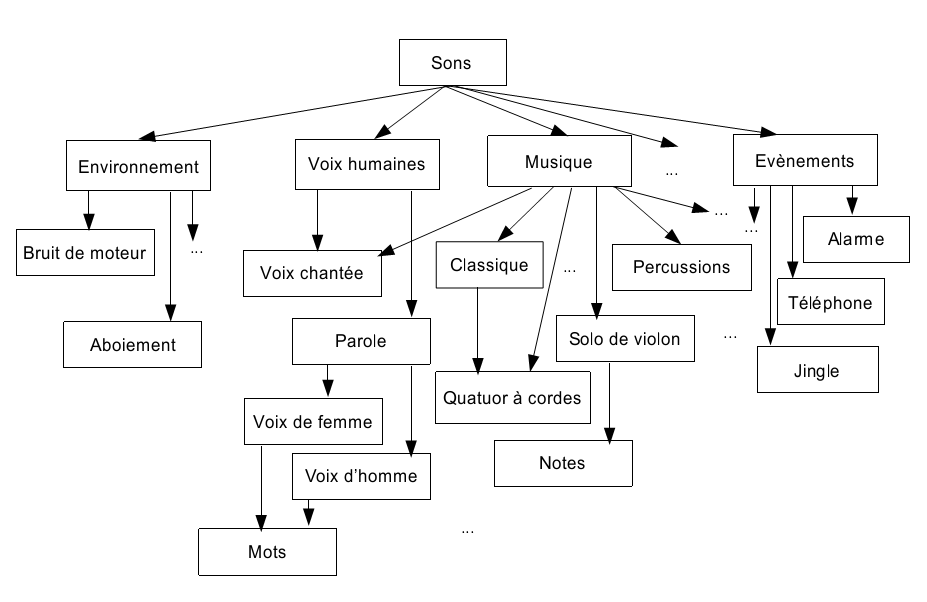

In [1]:
from IPython.core.display import Image
Image(filename='images/classes-audio.png')
# Figure 1.  Exemple de schéma classification audio général.

Le principe général des systèmes de classification supervisée (cf. figure 2) inclut deux étapes :

*  une étape d’apprentissage qui peut être vue comme une phase de développement aboutissant à la mise en oeuvre d’une stratégie de classification ;

*  une étape de test par laquelle les performances du système de classification sont évaluées.

En général, un système n’est prêt pour une utilisation réelle qu’après une succession d’étapes d’apprentissage et de test permettant de mettre en place une stratégie de classification efficace.

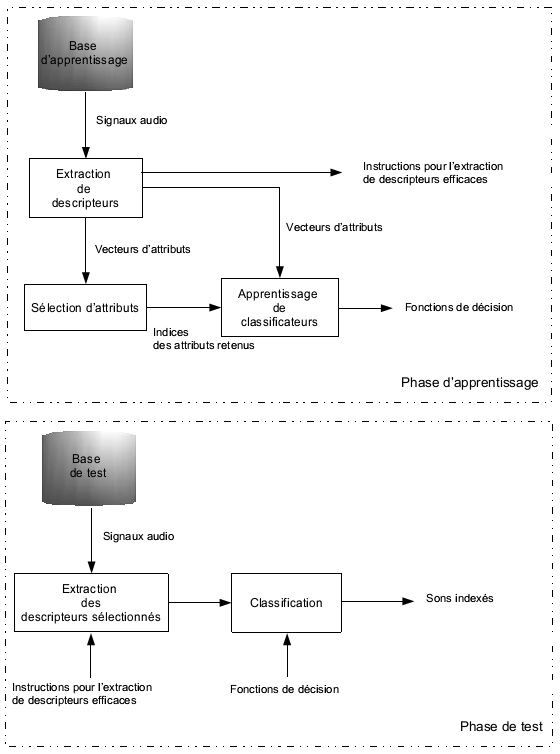

In [2]:
Image(filename="images/systeme-classif.png")  # Figure 2. Architecture générale d’un système de classification

La phase d’apprentissage comprend :

* l’extraction à partir d’une base de données de référence appelée *base d’apprentissage*, de descripteurs sous forme de paramètres numériques. Ces paramètres qui sont aussi appelés attributs ou caractéristiques (features en anglais) sont sensés caractériser des propriétés des signaux pouvant révéler leur appartenance à l’une des classes envisagées.

* La sélection d’attributs efficaces ; en pratique un nombre élevé de descripteurs « candidats » qui ne servent pas tous les performances de classification est considéré, il est alors intéressant d’avoir recours à des techniques permettant de retenir un sous-ensemble d’attributs (de plus petite taille) qui garantisse les meilleurs résultats de classification.

* L’apprentissage à partir des attributs sélectionnés de fonctions de classification ou fonctions de décision, lesquelles fonctions serviront à assigner des observations d’attributs de nouveaux exemples (de test) à l’une des classes possibles.

Lors de l’étape de test il n’est nécessaire d’extraire des signaux que les attributs qui ont été retenus et de décider de l’appartenance de ces signaux aux classes possibles en utilisant les fonctions de décisions apprises.

Nous utiliserons dans ce projet un classifieur particulier : les $K$ plus proches voisins ($K$-ppv) et nous l'appliquerons à la reconnaissance automatique des instruments de musique.

L'algorithme des $K $  plus proches voisins
=======================================

Pour classifier un exemple de test, représenté par un vecteur de caractéristiques $x$, on procède de la façon suivante :

*  on calcule les distances de $x$ à l'ensemble des exemples d'apprentissage ;

*  on retient les $K$ exemples les plus proches ; 

* on attribut à $x$ la classe la plus représentée parmi ces $K$ exemples.

Dans certains cas simples, le choix $K = 1 $ peut s'avérer suffisant.

Application à la reconnaissance des instruments de musique
==========================================================

Données de travail
------------------

On utilisera dans ce travail une base de données de 60 signaux musicaux, chacun d'entre eux étant un extrait de solo de l'un des 4 instruments suivants : clarinette, piano, trompette et violon (il y a 15 morceaux par instrument). Les fichiers sonores sont donnés à titre indicatif. On travaillera avec un ensemble de descripteurs acoustiques qui ont été préalablement extraits à partir des signaux (choisis de manière à permettre la discimination des timbres). Ces descripteurs sont donnés dans un fichier texte, [ici](http://perso.telecom-paristech.fr/~gramfort/liesse/instrument_features.csv), où chaque ligne correspond à un morceau, plus précisément, sur chaque ligne sont donnés dans l'ordre :

*  20 paramètres acoustiques (séparés par des virgules) caractérisant l'instrument joué ;

*  le nom de l'instrument correspondant ;

*  le nom du fichier son correspondant (que l'on pourra écouter).

Réalisation
-----------


On écrira un porgramme Python permettant de reconnaître les instruments (en solo) à l'aide de l'agorithme des $K$ plus proches voisins. On traitera dans un premier temps le cas $K=1$.

De manière à tester les performances de l'algorithme de classification, le protocole d'évaluation suivant sera utilisé :

*  on tirera au hasard un signal parmi 15 pour chaque instrument; les 4 exemples obtenus serviront d'exemples de test ;

*  on utilisera les 56 signaux restant comme base d'apprentissage pour classifier les exemples de test précédents (supposés inconnus).

On pourra répéter plusieurs fois cette opération pour réaliser une évaluation de l'algorithme, en mesurant par exemple le taux de bonne reconnaissance. On dit qu'on a fait de la *validation croisée*.

